In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn import tree,metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(15,10)})
pd.options.display.float_format = "{:,.5f}".format

In [43]:
df = pd.read_csv('data1.txt', sep = ' ')
df.head()

,y,x1,x2,x3,x4
1,0.56079,0.54987,9,0.07745,0.23123
2,0.06453,0.60443,7,0.90524,0.80497
3,-1.14136,1.12974,8,0.93199,0.98239
4,-0.68712,0.31151,10,0.76024,0.62593
5,-0.97936,1.04509,13,0.36511,0.56489


In [44]:
df.describe()

,y,x1,x2,x3,x4
count,250.00000,250.00000,250.00000,250.00000,250.00000
mean,0.00918,0.64416,10.50000,0.52670,0.56183
std,0.97997,0.44027,3.43295,0.36804,0.29502
min,-2.58914,0.01698,3.00000,0.00001,0.01505
25%,-0.66612,0.32712,9.00000,0.14640,0.29964
50%,0.03514,0.55060,10.00000,0.56738,0.56894
75%,0.54708,0.88052,12.00000,0.90672,0.79214
max,5.50000,2.62514,35.00000,0.99997,1.35132


In [45]:
def removeOutliers(df):
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 2).all(axis=1)
    new_df = df[filtered_entries]
    return new_df

new_df = removeOutliers(df)

In [46]:
def regress(X, y):
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(X)
    arr=[1,2,3,4,5]
    for i in arr:
        poly_reg = PolynomialFeatures(degree=i)
        X_poly = poly_reg.fit_transform(X)
        lin_reg_2 = LinearRegression()
        lin_reg_2.fit(X_poly, y)
        y_pred = lin_reg_2.predict(X_poly)
        print(r2_score(y, y_pred))

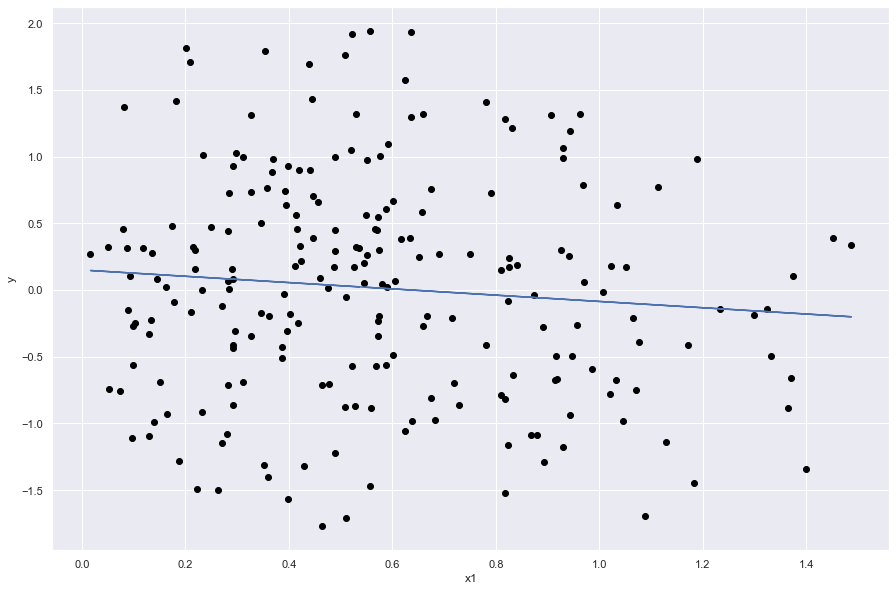

In [47]:
plt.scatter(new_df.x1, new_df.y, color='black');
m, b = np.polyfit(new_df.x1, new_df.y, 1)
plt.xlabel('x1')
plt.ylabel('y')

plt.plot(new_df.x1, m*new_df.x1 + b)

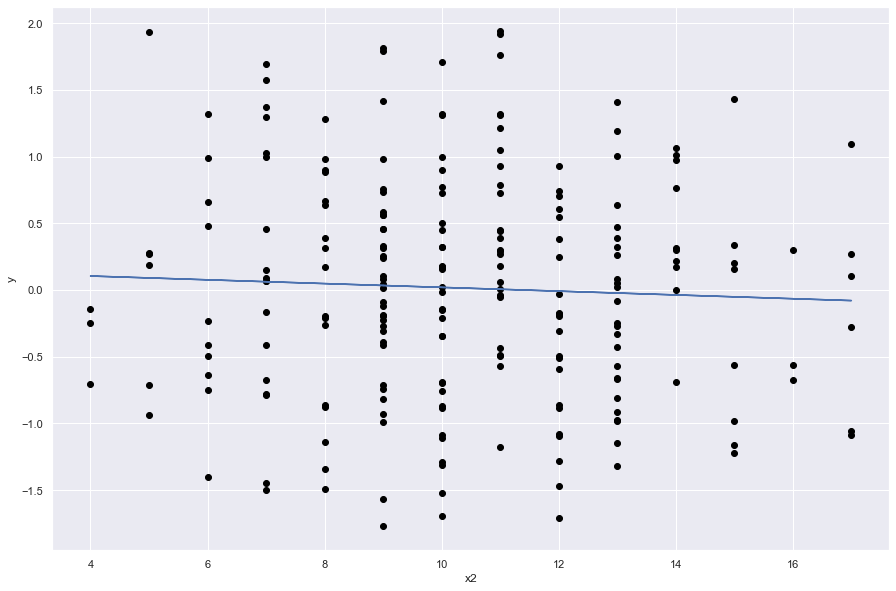

In [48]:
plt.scatter(new_df.x2, new_df.y, color='black');
m, b = np.polyfit(new_df.x2, new_df.y, 1)
plt.xlabel('x2')
plt.ylabel('y')

plt.plot(new_df.x2, m*new_df.x2 + b)

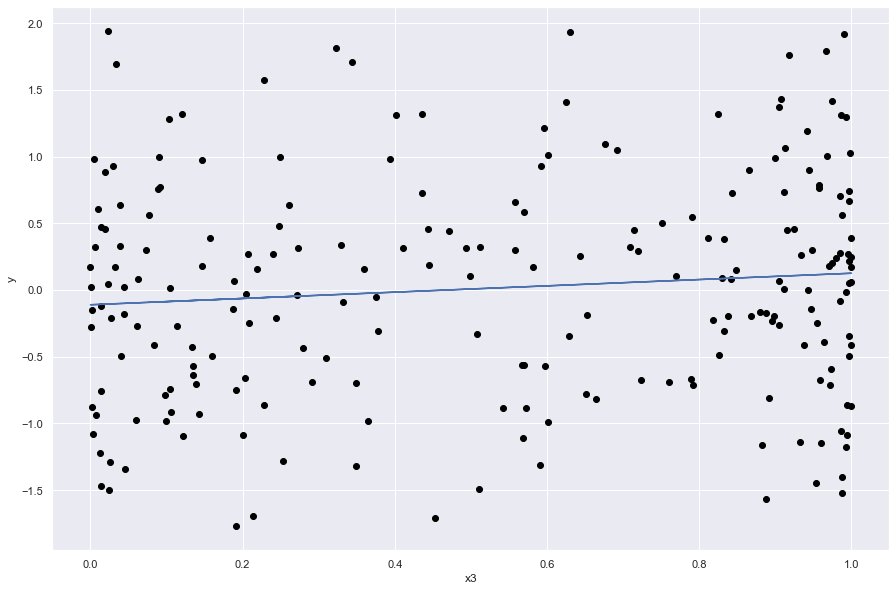

In [49]:
plt.scatter(new_df.x3, new_df.y, color='black');
m, b = np.polyfit(new_df.x3, new_df.y, 1)
plt.xlabel('x3')
plt.ylabel('y')

plt.plot(new_df.x3, m*new_df.x3 + b)

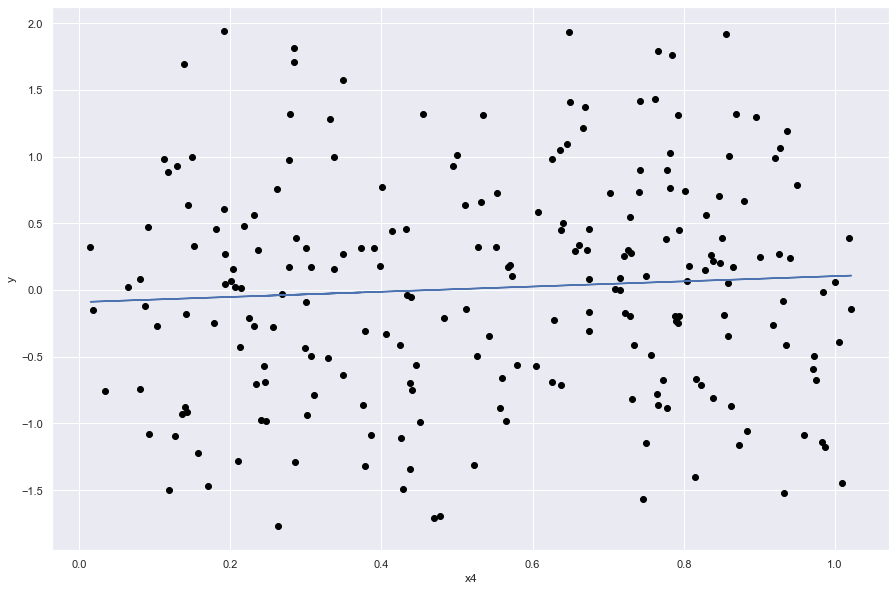

In [50]:
plt.scatter(new_df.x4, new_df.y, color='black');
m, b = np.polyfit(new_df.x4, new_df.y, 1)
plt.xlabel('x4')
plt.ylabel('y')

plt.plot(new_df.x4, m*new_df.x4 + b)

In [51]:
#model
X = new_df.drop('y',axis=1)
y = new_df.y
regress(X, y)

0.024148249221333185
0.054558779284850756
0.14439831730108066
-0.015974911784107704
-1.268547458966132


In [52]:
df.corr()
#x4 has high corr with x1 and x3. Hence, needs to be dropped
#x2 can be dropped seeing its graph i.e. no liear behaviour as such

,y,x1,x2,x3,x4
y,1.00000,-0.04384,-0.03168,0.05225,0.02764
x1,-0.04384,1.00000,-0.04776,0.03855,0.47982
x2,-0.03168,-0.04776,1.00000,-0.05131,-0.06700
x3,0.05225,0.03855,-0.05131,1.00000,0.89455
x4,0.02764,0.47982,-0.06700,0.89455,1.00000


In [53]:
temp = df

In [54]:
df=df.drop('x4',axis=1)
new_df = removeOutliers(df)
new_df.describe()

,y,x1,x2,x3
count,222.00000,222.00000,222.00000,222.00000
mean,0.01503,0.57260,10.33333,0.53183
std,0.83430,0.33108,2.82149,0.36882
min,-1.76548,0.01698,4.00000,0.00001
25%,-0.65076,0.31161,9.00000,0.14915
50%,0.04811,0.52892,10.00000,0.56879
75%,0.55764,0.81832,12.00000,0.91135
max,1.93784,1.48718,17.00000,0.99997


In [39]:
X=new_df.drop('y',axis=1)
y=new_df.y
regress(X, y)

0.0197328346943364
0.046653818471052544
0.08811894213132643
-0.01644972750642215
0.2367479058549069


In [40]:
df = temp
df=df.drop('x4',axis=1)
new_df = removeOutliers(df)
new_df.describe()

,y,x1,x3
count,228.00000,228.00000,228.00000
mean,0.01028,0.57173,0.53059
std,0.83017,0.32998,0.36895
min,-1.76548,0.01698,0.00001
25%,-0.63972,0.30807,0.14942
50%,0.04811,0.52892,0.56879
75%,0.51384,0.81817,0.91108
max,1.93784,1.48718,0.99997
